In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

import warnings; warnings.simplefilter('ignore')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 15}

# plt.rc('font', **font)


# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# import pandas as pd
# import glob
# import os

# files = os.path.join("/Users/hitomihoshino/Documents/DS/salesforce/japan","scrape_en*.csv")
# files = glob.glob(files)

# df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# df.to_csv('review_en.csv')

df = pd.read_csv('review_en.csv')

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.isna().sum()

Unnamed: 0            0
タイトル                101
タイトルリンク             101
typography-hy         0
point               198
w-100                 0
口コミ投稿日                0
text-center           0
report                0
report1               0
Unnamed: 0.1        361
Unnamed: 0.1.1      361
Unnamed: 0.1.1.1    461
dtype: int64

In [5]:
df.shape

(686, 13)

In [6]:
df.columns

Index(['Unnamed: 0', 'タイトル', 'タイトルリンク', 'typography-hy', 'point', 'w-100',
       '口コミ投稿日', 'text-center', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','タイトルリンク', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'text-center'], axis = 1, inplace = True)

In [8]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     '口コミ投稿日': 'date',
                    }, inplace = True)

In [9]:
df.dtypes

reviewer_info     object
title             object
rating           float64
review            object
date              object
dtype: object

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.isna().sum()

reviewer_info     52
title              0
rating           115
review             0
date               0
dtype: int64

### Filling NaN values in ratting col with the mean of around 4.5

In [12]:
df['rating'].unique()
# df['rating'].replace(np.nan, 4.5, inplace = True)
df['rating'] = df['rating'].ffill(axis = 0)

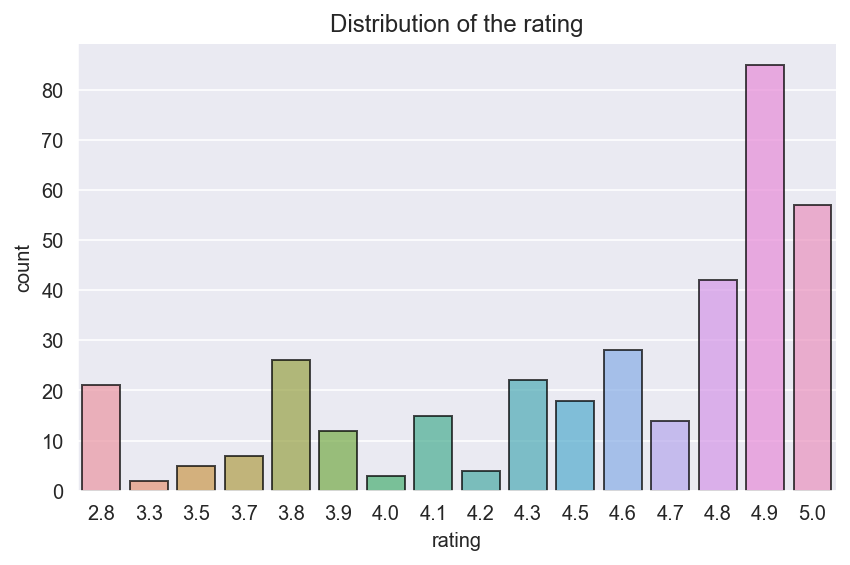

In [13]:
sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=df)
sns.despine()
plt.title("Distribution of the rating")

plt.tight_layout()
plt.show()

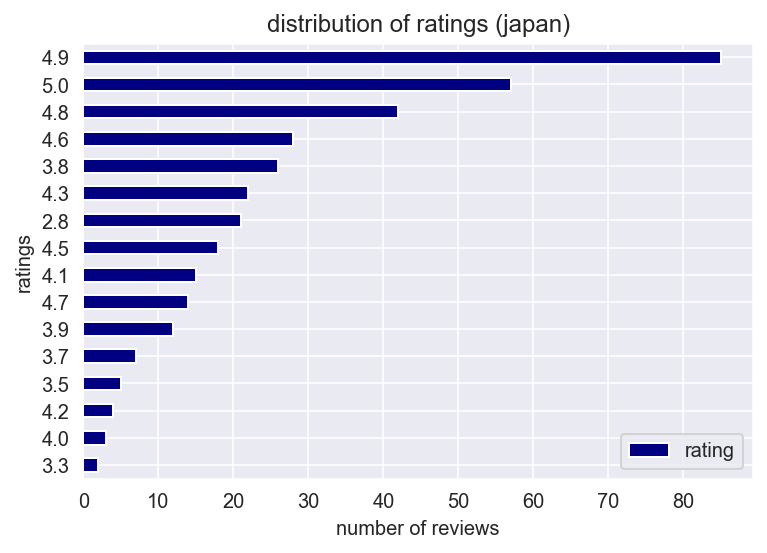

In [14]:
plt.title('distribution of ratings (japan)')

ax = df['rating'].value_counts(ascending=True).plot(kind = 'barh', color = 'Navy')
ax.set_xlabel("number of reviews")
ax.set_ylabel("ratings")
ax.legend()

In [15]:
# df['rating'] = df['rating'].replace([2.8],2)
# df['rating'] = df['rating'].replace([3.8, 3.5, 3.7, 3.3, 3.9],3)
# df['rating'] = df['rating'].replace([4.7, 4.9, 4.5, 4.6, 4.8, 4.1, 4.3, 4., 4.2],4)

In [16]:
df.rating.unique()

array([4.7, 5. , 4.9, 2.8, 3.8, 4.5, 4.6, 4.8, 3.5, 4.1, 4.3, 4. , 3.9,
       3.7, 4.2, 3.3])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_info  309 non-null    object 
 1   title          361 non-null    object 
 2   rating         361 non-null    float64
 3   review         361 non-null    object 
 4   date           361 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.0+ KB


In [18]:
# df['column name'] = df['column name'].replace(['old value'],'new value')
df['title'] = df['title'].replace(['働き方（勤務時間・休日休暇・制度）'], 'Work style (working hours/holidays/systems)')
df['title'] = df['title'].replace(['年収・給与'], 'Annual salary/salary')
df['title'] = df['title'].replace(['企業カルチャー・組織体制'], 'Corporate culture/organizational system')
df['title'] = df['title'].replace(['福利厚生・オフィス環境'], 'Benefits/office environment')
df['title'] = df['title'].replace(['事業展望・強み・弱み'], 'Business prospects/strengths/weaknesses')
df['title'] = df['title'].replace(['入社前とのギャップ'], 'Gap before joining the company')
df['title'] = df['title'].replace(['女性の働きやすさ'], 'working for women')
df['title'] = df['title'].replace(['成長・働きがい'], 'Growth/motivation')

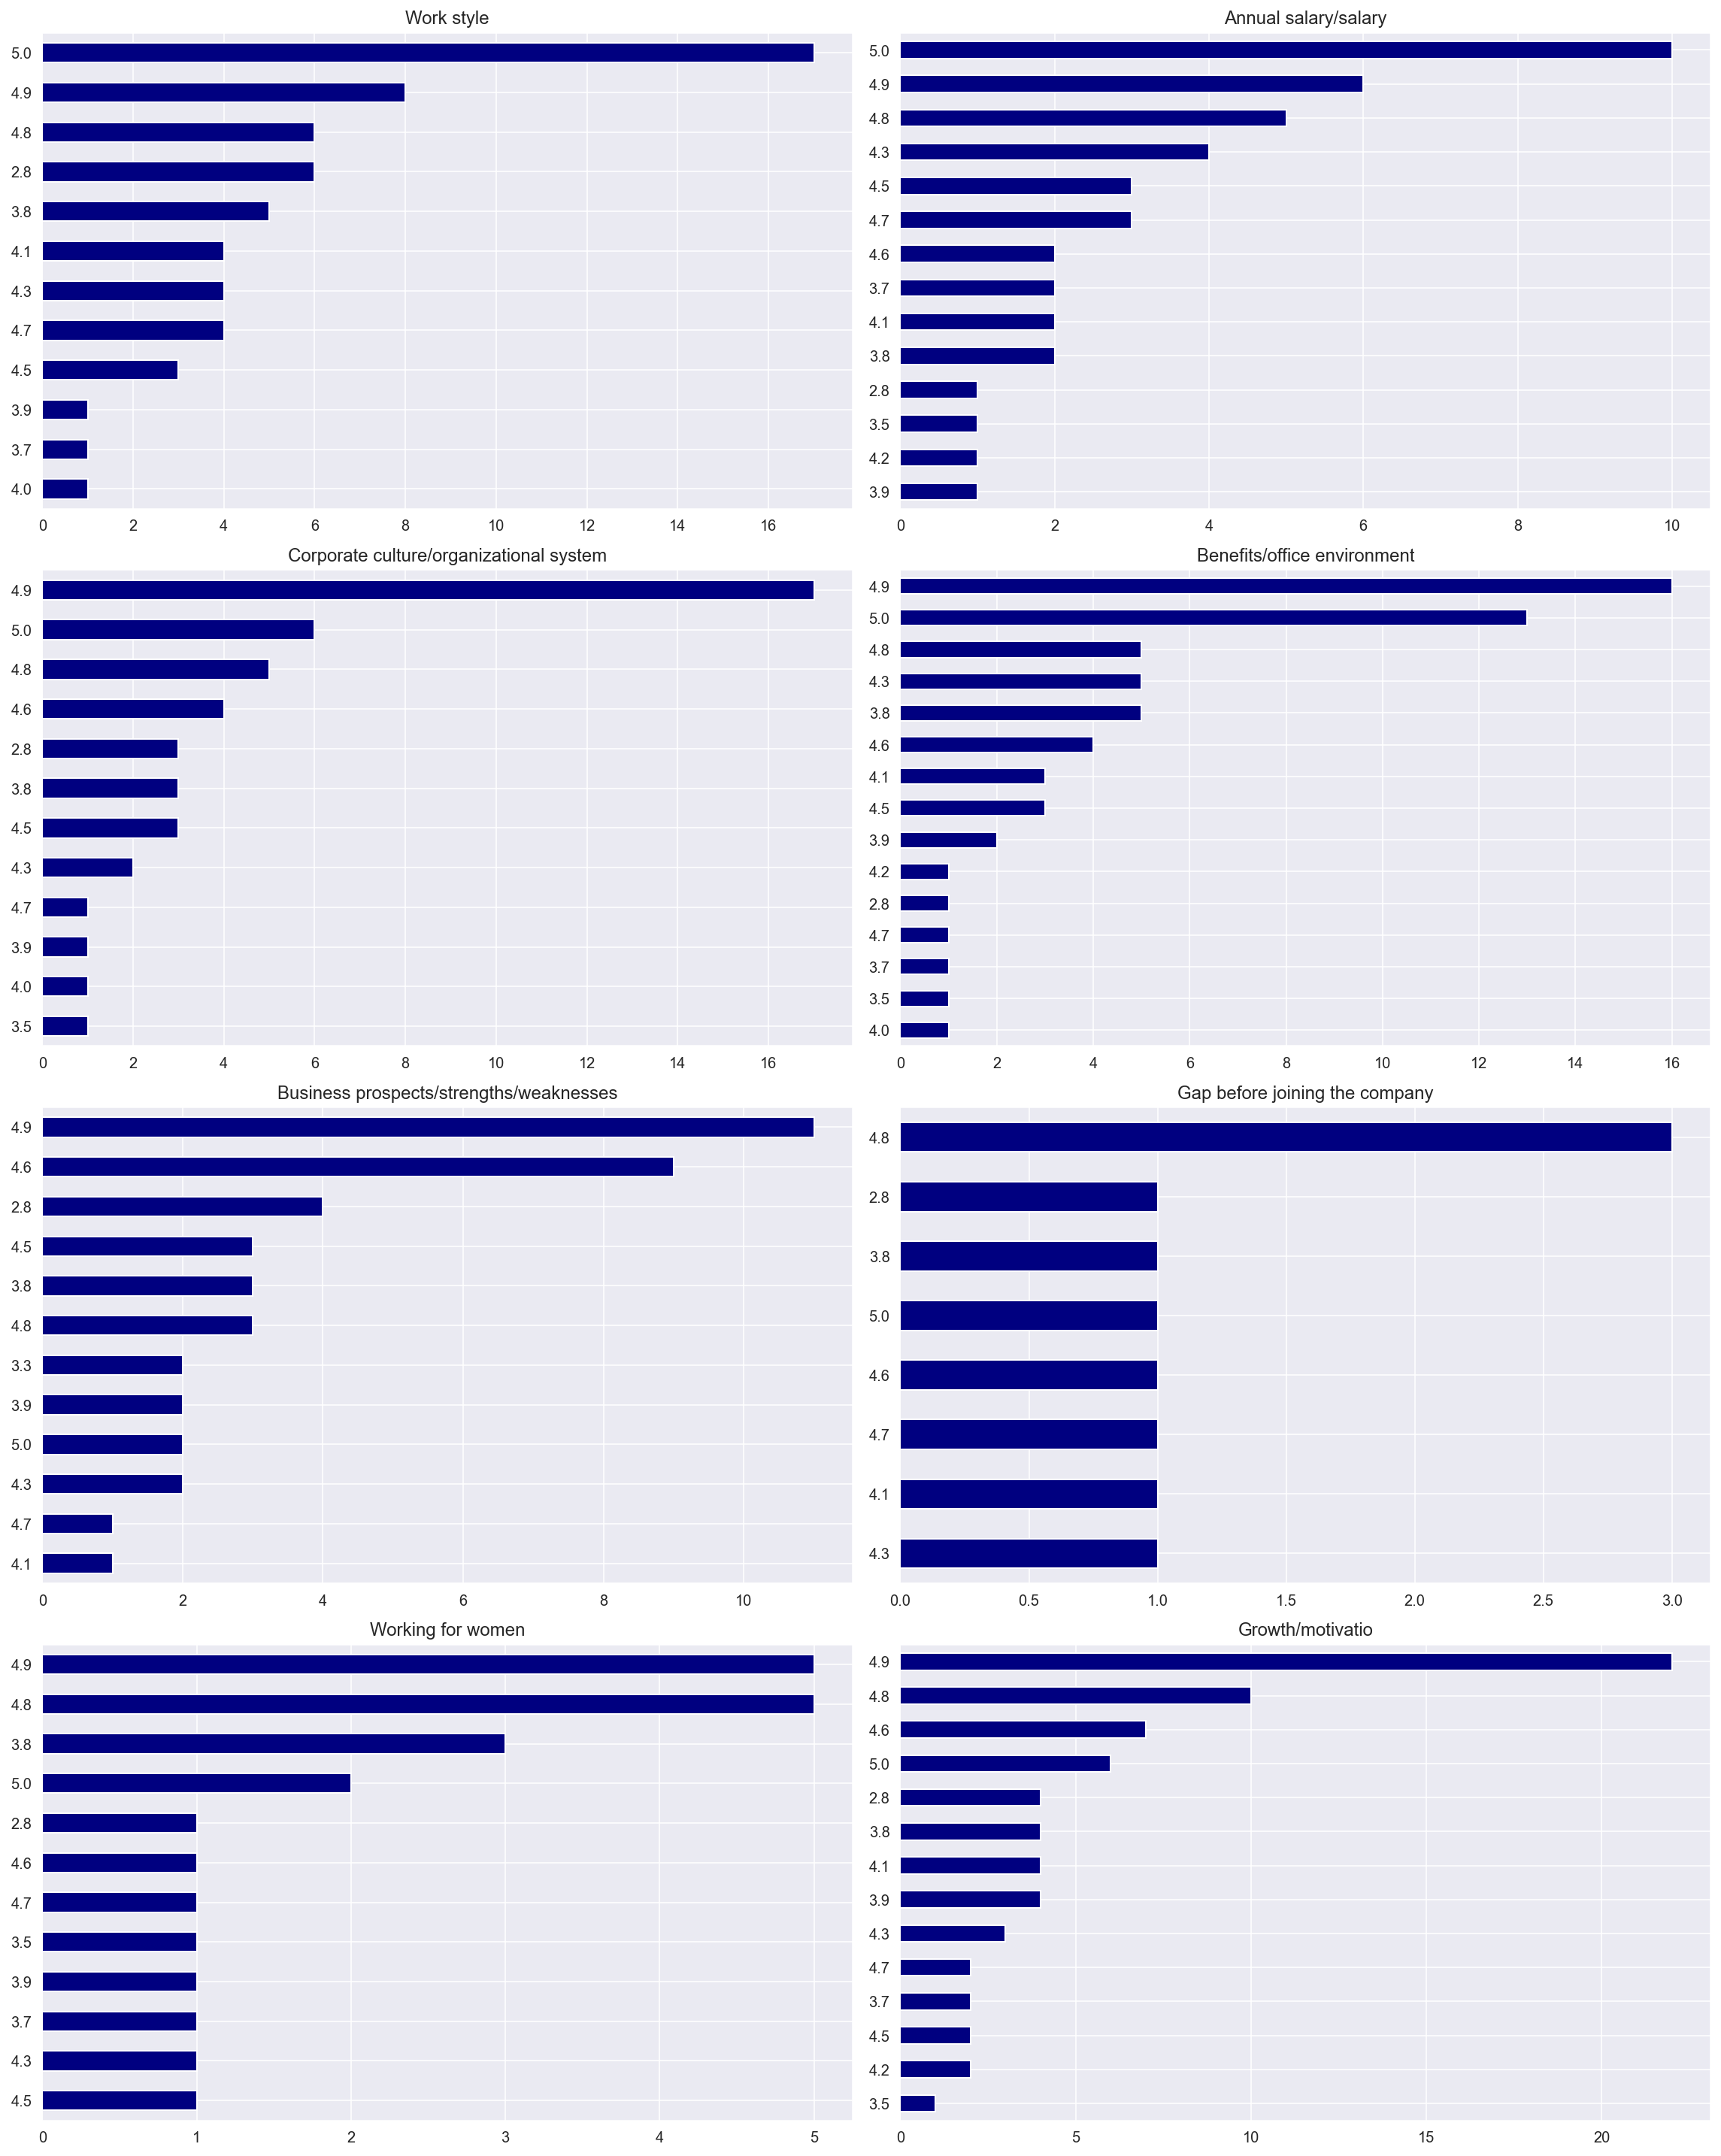

In [19]:
fig, ax = plt.subplots(4,2, figsize=(16,20))

work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][0], title='Work style')

salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][1], title='Annual salary/salary')

culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][0], title='Corporate culture/organizational system')

benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][1], title='Benefits/office environment')

business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][0], title='Business prospects/strengths/weaknesses')

gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][1], title='Gap before joining the company')

women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][0], title='Working for women')

motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][1], title='Growth/motivatio')

fig.tight_layout()
plt.show()


In [20]:
# plt.figure(figsize=[15,8])
# data = [work_balance, salary, benefit, business, gap, women, motivation]
# n=1
# for i in data:
#     plt.subplot(2,6,n)
#     sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=i)
#     sns.despine()
#     plt.title("{}".format(i))
#     n=n+1
# # plt.tight_layout()
# plt.show()

NameError: name 'i' is not defined

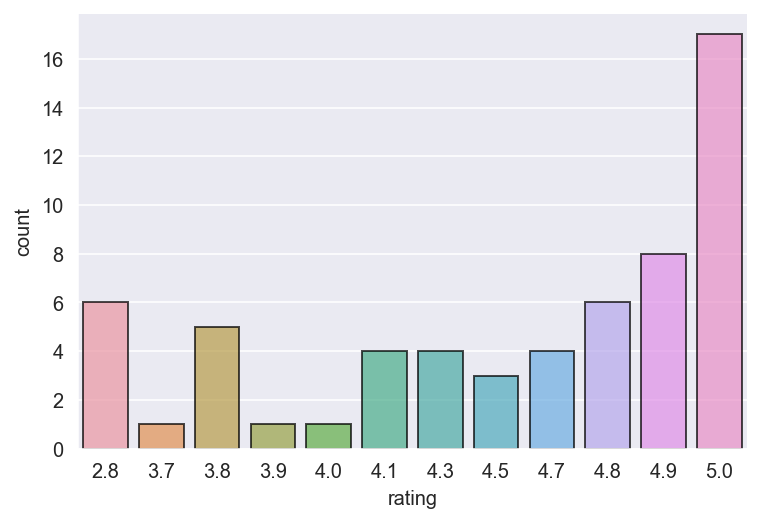

In [21]:
# data = [work_balance, salary, benefit, business, gap, women, motivation]

sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=work_balance)
sns.despine()
plt.title("{}".format(i))


plt.tight_layout()
plt.show()

In [22]:
df['job_title'] = df['reviewer_info']

In [23]:
df.isna().sum()

reviewer_info    52
title             0
rating            0
review            0
date              0
job_title        52
dtype: int64

In [24]:
# df[df['job_title'].str.contains('営業', na=False, regex=True)] = 'sales'

df.loc[df['job_title'].str.contains('営業|Sales|販売|事務', na=False, regex=True), 'job_title'] = 'sales'
df.loc[df['job_title'].str.contains('Solution Engineer|SE', na=False, regex=True), 'job_title'] = 'solution engineer'
df.loc[df['job_title'].str.contains('インサイドセールス', na=False, regex=True), 'job_title'] = 'inside sales'
df.loc[df['job_title'].str.contains('カスタマーサクセス', na=False, regex=True), 'job_title'] = 'customer success'
df.loc[df['job_title'].str.contains('アカウントエグゼクティブ|AE|アカウント・エグゼクティブ|account executive|エグゼクティブ', na=False, regex=True), 'job_title'] = ''
df.loc[df['job_title'].str.contains('BDR', na=False, regex=True), 'job_title'] = 'BDR'
df.loc[df['job_title'].str.contains('サポート', na=False, regex=True), 'job_title'] = 'support'
df.loc[df['job_title'].str.contains('IT', na=False, regex=True), 'job_title'] = 'IT Engineer'
df.loc[df['job_title'].str.contains('サクセスマネージャー', na=False, regex=True), 'job_title'] = 'success '
df.loc[df['job_title'].str.contains('アカウントパートナー', na=False, regex=True), 'job_title'] = 'account partner'
df.loc[df['job_title'].str.contains('6903', na=False, regex=True), 'job_title'] = np.nan
df.loc[df['job_title'].str.contains('企画|広告|宣伝|広告宣伝', na=False, regex=True), 'job_title'] = 'marketing'
df.loc[df['job_title'].str.contains('法務', na=False, regex=True), 'job_title'] = 'legal'
df.loc[df['job_title'].str.contains('ストラテジー', na=False, regex=True), 'job_title'] = 'strategy'
df.loc[df['job_title'].str.contains('税務', na=False, regex=True), 'job_title'] = 'accounting'


# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''
# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''
# df.loc[df['job_title'].str.contains('', na=False, regex=True), 'job_title'] = ''

In [25]:
len(df['job_title'].unique())

15

In [26]:
df.head(2)

,reviewer_info,title,rating,review,date,job_title
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日,sales
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日,sales


In [27]:
df['gender'] = df['reviewer_info']
df.loc[df['gender'].str.contains('男性', na=False, regex=True), 'gender'] = 'men'
df.loc[df['gender'].str.contains('女性', na=False, regex=True), 'gender'] = 'women'

In [28]:
df['new_grads'] = df['reviewer_info']
df.loc[df['new_grads'].str.contains('新卒', na=False, regex=True), 'new_grads'] = 'new grad'
df.loc[df['new_grads'].str.contains('中途', na=False, regex=True), 'new_grads'] = 'not new grad'
df.loc[df['new_grads'].str.contains('現職|退職済み', na=False, regex=True), 'new_grads'] = np.nan

In [29]:
df['full_time'] = df['reviewer_info']
df.loc[df['full_time'].str.contains('正社員', na=False, regex=True), 'full_time'] = 'full time'
df.loc[df['full_time'].str.contains('非|非正社員|契約社員|派遣社員', na=False, regex=True), 'full_time'] = 'part time'
# df.loc[df['full_time'].str.contains('非|非正社員', na=False, regex=True), 'full_time'] = 0

In [30]:
df.loc[df['date'].str.contains('2018', na=False, regex=True), 'date'] = '2018'
df.loc[df['date'].str.contains('2019', na=False, regex=True), 'date'] = '2019'
df.loc[df['date'].str.contains('2020', na=False, regex=True), 'date'] = '2020'
df.loc[df['date'].str.contains('2021', na=False, regex=True), 'date'] = '2021'
df.loc[df['date'].str.contains('2022', na=False, regex=True), 'date'] = '2022'
df.loc[df['date'].str.contains('2015', na=False, regex=True), 'date'] = '2015'
df.loc[df['date'].str.contains('2016', na=False, regex=True), 'date'] = '2016'
df.loc[df['date'].str.contains('2017', na=False, regex=True), 'date'] = '2017'
# df.loc[df['gender'].str.contains('女性', na=False, regex=True), 'gender'] = 'women'

In [31]:
df.date.unique()

array(['2022', '2021', '2020', '2019', '2015', '2016', '2017', '2018'],
      dtype=object)

In [32]:
df.head(6)

,reviewer_info,title,rating,review,date,job_title,gender,new_grads,full_time
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022,sales,men,not new grad,full time
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021,sales,men,not new grad,full time
2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,Annual salary/salary,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020,solution engineer,men,not new grad,full time
3,男性/ 6903/ 現職（回答時）/ 中途入社/ 在籍6～10年/ 正社員,Corporate culture/organizational system,4.9,企業カルチャー・社風:カスタマーサクセスを打ち出しており、導入後も運用をサポートする部門が支...,2021,NaN,men,not new grad,full time
4,男性/ カスタマーサクセス/ 現職（回答時）/ 中途入社/ 在籍11～15年/ 正社員/ デ...,Benefits/office environment,5.0,福利厚生:オフィス内のカフェテリアは充実している。エスプレッソマシンは自動であるが、豆もそれ...,2020,customer success,men,not new grad,full time
5,女性/ アカウントエグゼクティブ/ 退職済み（2022年）/ 中途入社/ 在籍3～5年/ 正社員,Work style (working hours/holidays/systems),2.8,勤務時間・休日休暇:ワークライフバランスは、アカウントエグゼクティブをしている限りはない。達...,2022,,women,not new grad,full time


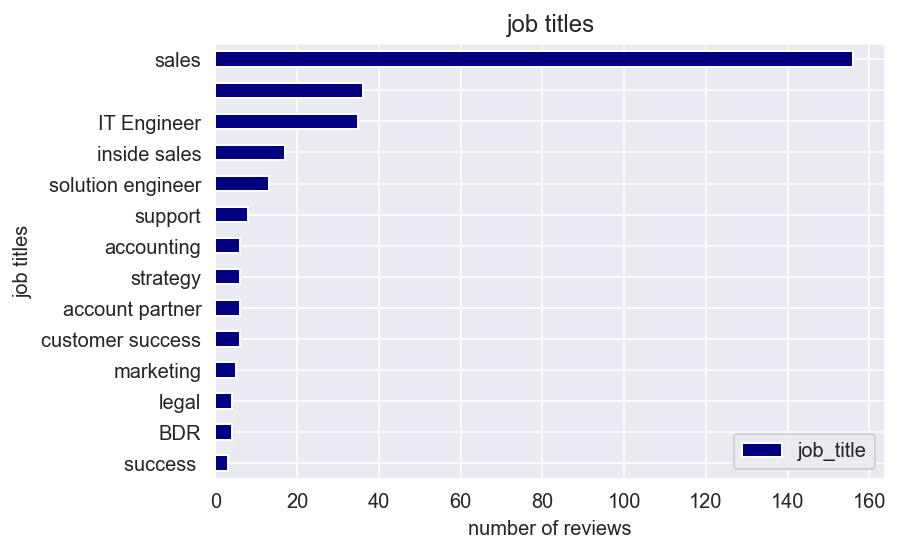

In [33]:
plt.title('job titles')

ax = df['job_title'].value_counts(ascending=True).plot(kind = 'barh', color = 'Navy')
ax.set_xlabel("number of reviews")
ax.set_ylabel("job titles")
ax.legend()

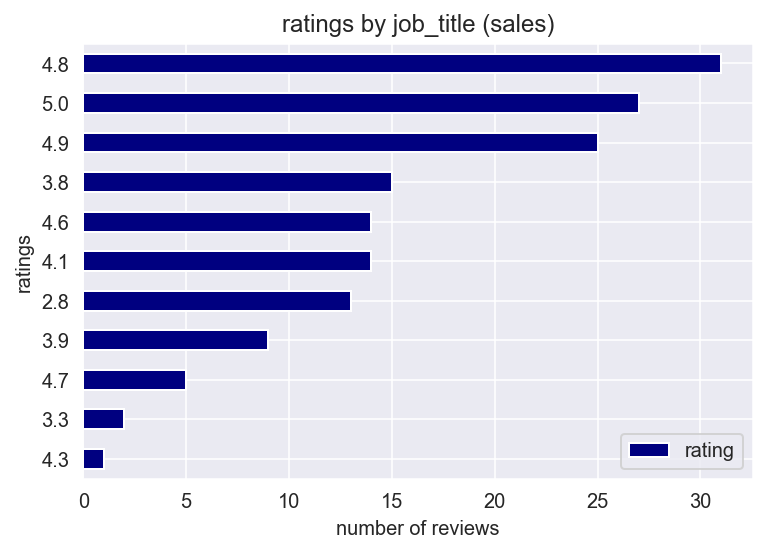

In [34]:
plt.title('ratings by job_title (sales)')

sales = df[df['job_title'] == 'sales']
ax = sales['rating'].value_counts(ascending=True).plot(kind = 'barh', color = 'Navy')
ax.set_xlabel("number of reviews")
ax.set_ylabel("ratings")
ax.legend()

In [35]:
df.isna().sum()

reviewer_info     52
title              0
rating             0
review             0
date               0
job_title         56
gender            52
new_grads        163
full_time         52
dtype: int64

In [36]:
df.rating.unique()

array([4.7, 5. , 4.9, 2.8, 3.8, 4.5, 4.6, 4.8, 3.5, 4.1, 4.3, 4. , 3.9,
       3.7, 4.2, 3.3])

In [37]:
bins = [0, 4, 5]
names = ['low', 'high']
df['eval'] = pd.cut(df['rating'], bins, labels=names)

In [38]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'date', 'job_title',
       'gender', 'new_grads', 'full_time', 'eval'],
      dtype='object')

In [39]:
df.drop(columns = ['reviewer_info'], inplace = True)

In [40]:
df['job_title'].ffill(inplace = True)
df['gender'].ffill(inplace = True)
df['new_grads'].ffill(inplace = True)
df['full_time'].ffill(inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   title      361 non-null    object  
 1   rating     361 non-null    float64 
 2   review     361 non-null    object  
 3   date       361 non-null    object  
 4   job_title  361 non-null    object  
 5   gender     361 non-null    object  
 6   new_grads  361 non-null    object  
 7   full_time  361 non-null    object  
 8   eval       361 non-null    category
dtypes: category(1), float64(1), object(7)
memory usage: 34.0+ KB


In [42]:
df.isna().sum()

title        0
rating       0
review       0
date         0
job_title    0
gender       0
new_grads    0
full_time    0
eval         0
dtype: int64

Perfect!

In [43]:
df.head(1)

,title,rating,review,date,job_title,gender,new_grads,full_time,eval
0,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022,sales,men,not new grad,full time,high


In [44]:
df.columns

Index(['title', 'rating', 'review', 'date', 'job_title', 'gender', 'new_grads',
       'full_time', 'eval'],
      dtype='object')

In [45]:
df_dum = pd.get_dummies(df, columns = ['title',  'date', 'job_title', 'gender', 'new_grads',
       'full_time', 'eval'])

In [46]:
df_dum.columns

Index(['rating', 'review', 'title_Annual salary/salary',
       'title_Benefits/office environment',
       'title_Business prospects/strengths/weaknesses',
       'title_Corporate culture/organizational system',
       'title_Gap before joining the company', 'title_Growth/motivation',
       'title_Work style (working hours/holidays/systems)',
       'title_working for women', 'date_2015', 'date_2016', 'date_2017',
       'date_2018', 'date_2019', 'date_2020', 'date_2021', 'date_2022',
       'job_title_', 'job_title_BDR', 'job_title_IT Engineer',
       'job_title_account partner', 'job_title_accounting',
       'job_title_customer success', 'job_title_inside sales',
       'job_title_legal', 'job_title_marketing', 'job_title_sales',
       'job_title_solution engineer', 'job_title_strategy',
       'job_title_success ', 'job_title_support', 'gender_men', 'gender_women',
       'new_grads_new grad', 'new_grads_not new grad', 'full_time_full time',
       'full_time_part time', 'eval_

In [51]:
df_dum.drop(columns = ['eval_low'], axis = 1, inplace = True)

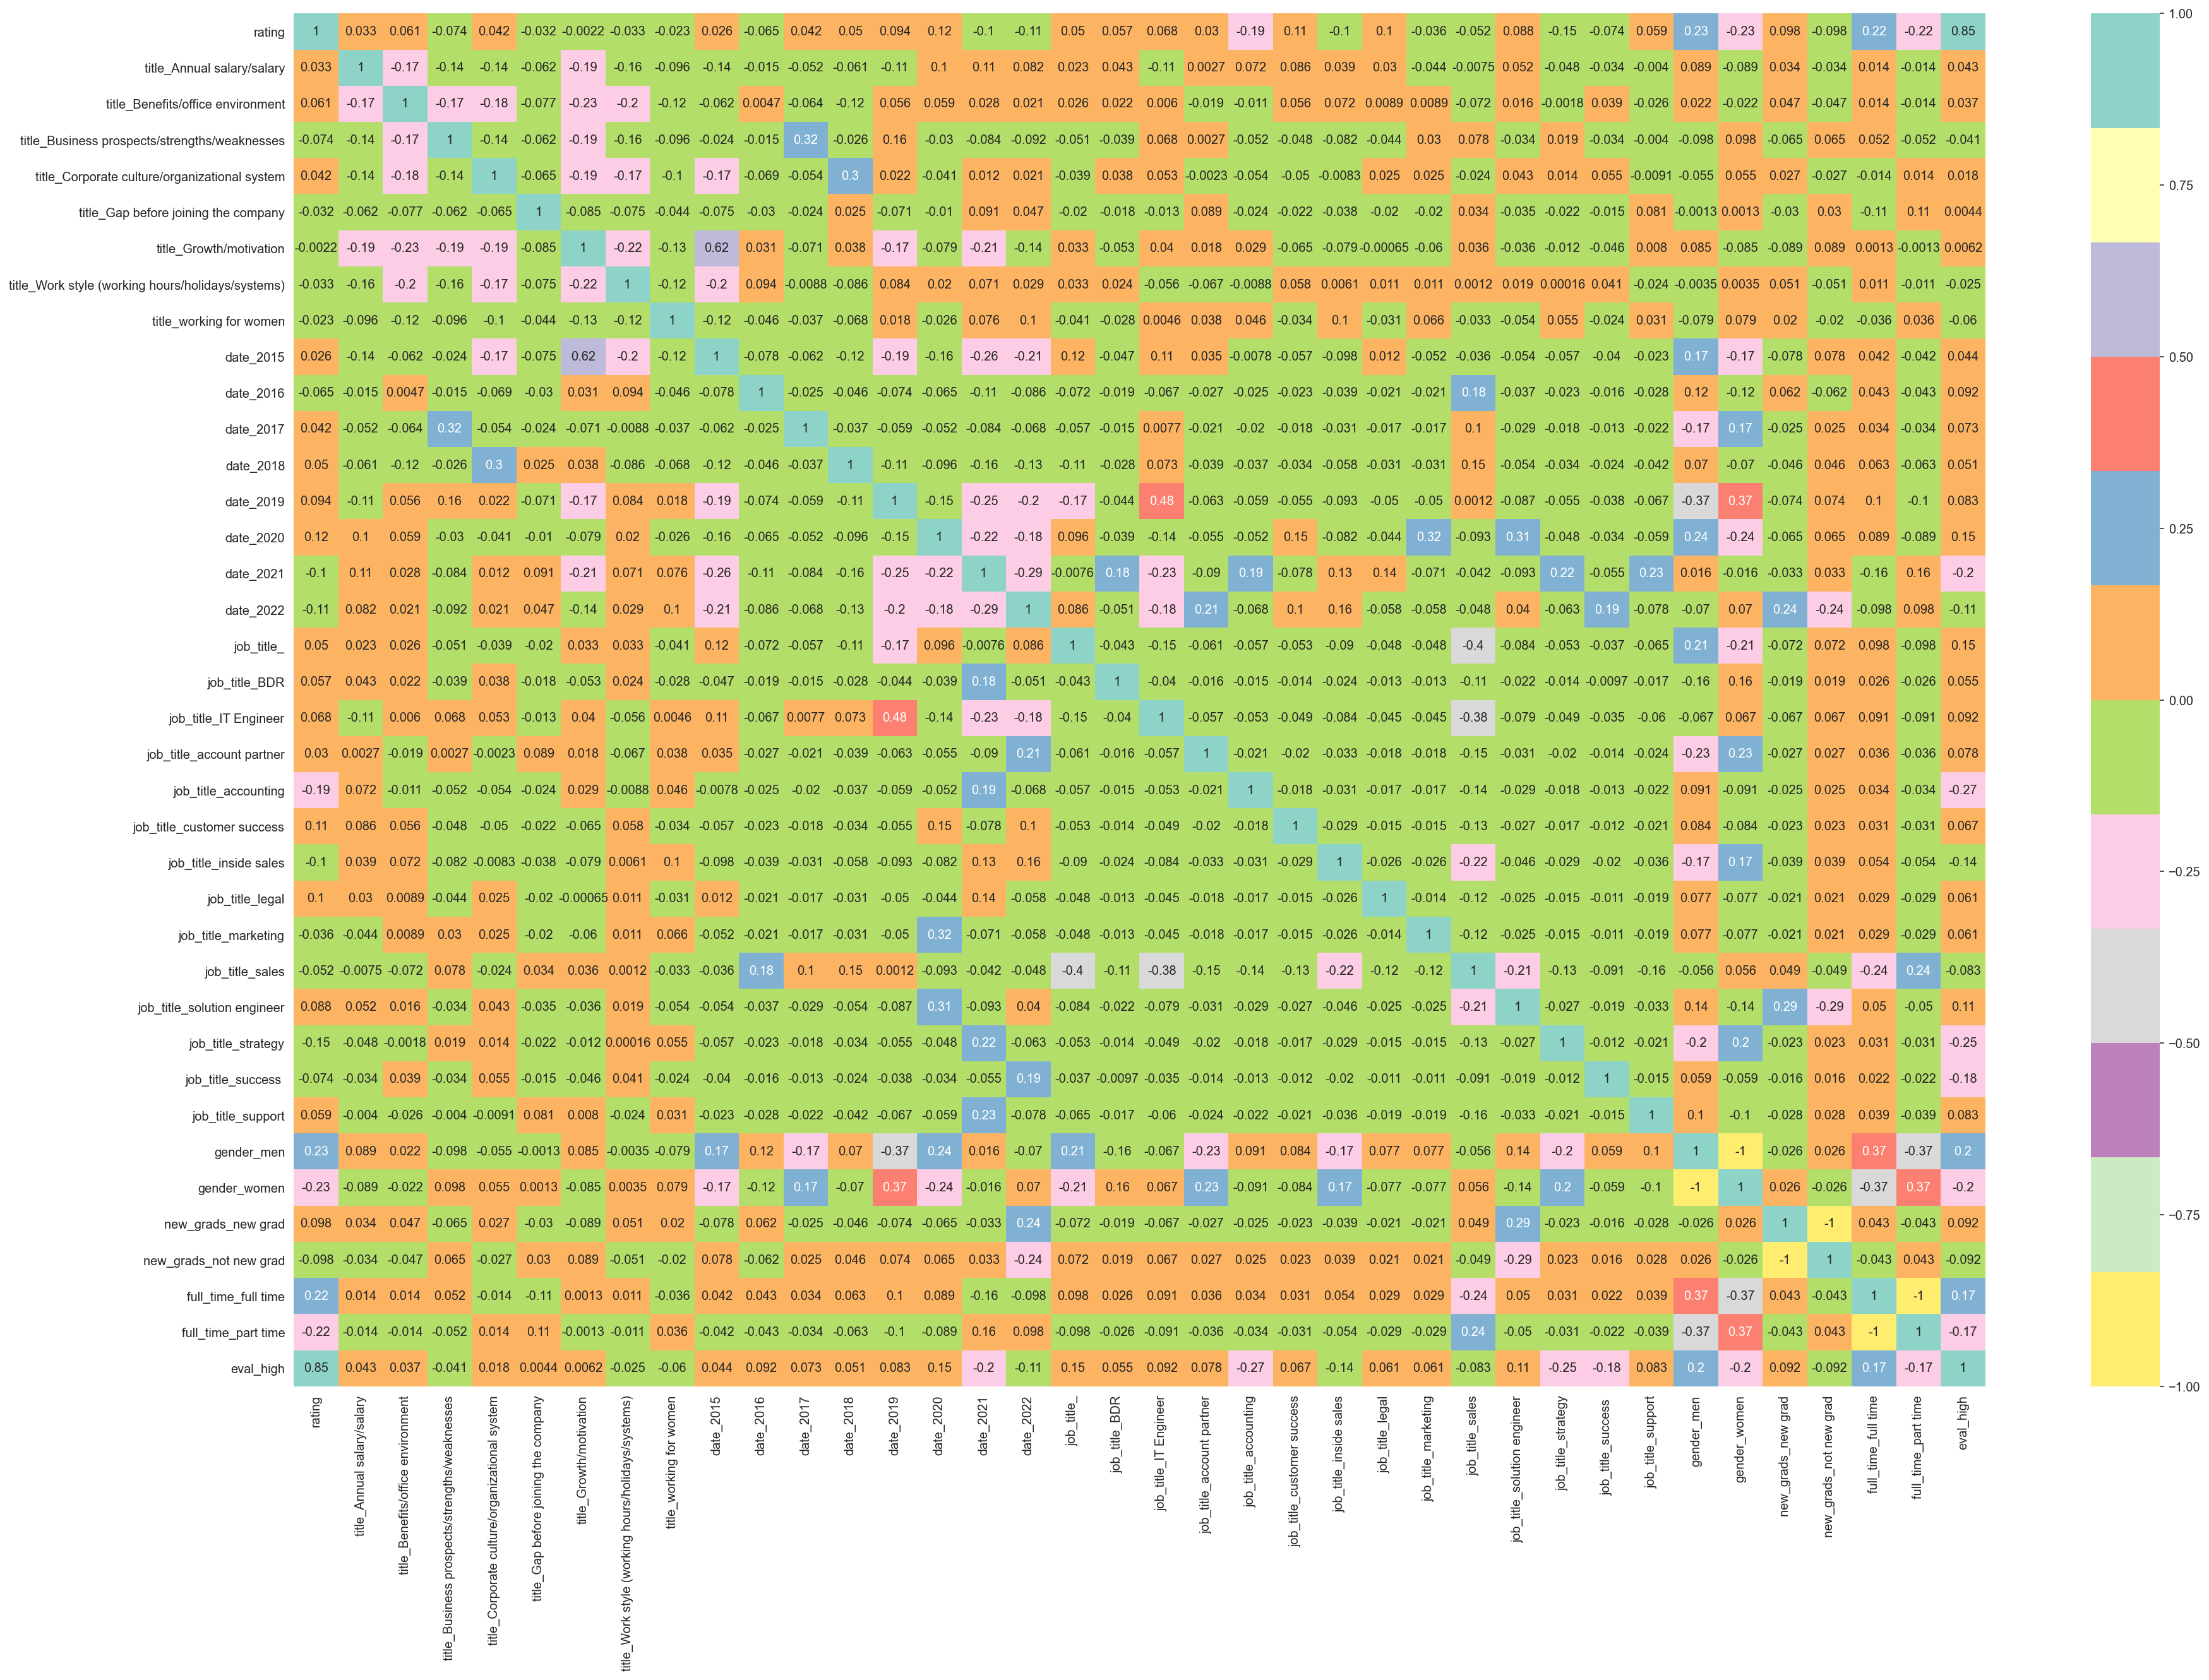

In [52]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(df_dum.corr(), annot=True, cmap="Set3_r")
plt.show()

In [53]:
sns.heatmap(df_dum['eval_high'], annot=True, fmt="g", cmap='viridis')

IndexError: Inconsistent shape between the condition and the input (got (361, 1) and (361,))